# Generadores de Números Aleatorios en Python

En este notebook aprenderemos sobre los **generadores de números aleatorios** y su uso en Python. Para trabajar con números aleatorios, utilizaremos la biblioteca `numpy`, que nos ofrece funciones eficientes para generar secuencias de números.

> **Nota:** Antes de comenzar, asegúrate de importar la librería `numpy`.

```python
import numpy as np
np.random.rand()  # Genera un número pseudoaleatorio entre 0 y 1
```

## ¿Qué es un número pseudoaleatorio?

Un **número pseudoaleatorio** es un valor generado mediante un algoritmo determinista, es decir, a partir de una fórmula matemática y una semilla inicial. Aunque estos números parecen aleatorios y cumplen con muchas de las propiedades estadísticas esperadas de la aleatoriedad, realmente son predecibles si se conoce la semilla y el algoritmo utilizados.

En otras palabras, los números generados por funciones como `np.random.rand()` **no son verdaderamente aleatorios**, sino que son "pseudoaleatorios". Esto significa que, si utilizamos la misma semilla, obtendremos siempre la misma secuencia de números.

**Ventajas de los números pseudoaleatorios:**
- Son rápidos de calcular.
- Permiten reproducir experimentos (útil en simulaciones y pruebas).

**Desventaja:**
- No deben usarse donde se requiera verdadera aleatoriedad, como en criptografía.

---

In [39]:
import numpy as np
"""
Primero configuremos una semilla para que los resultados sean reproducibles.
Esto es útil para garantizar que los resultados sean consistentes en diferentes ejecuciones del código.
"""
np.random.seed(123) # Siempre que uses la misma semilla, obtendrás los mismos números aleatorios.

coin = np.random.randint(0, 2)  
print(coin)
print("Lanzamiento de la moneda:", "Cara" if coin == 1 else "Cruz")

0
Lanzamiento de la moneda: Cruz


El siguiente código simula el lanzamiento de una moneda al aire diez veces, utilizando un generador de números aleatorios configurado previamente. De esta manera, puedes observar los resultados de cada lanzamiento y cómo se pueden registrar de diferentes formas.

### Ejemplo 1: Registrar cada resultado como "heads" o "tails"

Este fragmento de código guarda el resultado de cada lanzamiento en una lista llamada `outcomes`, donde cada elemento es "heads" (cara) o "tails" (cruz):

```python
import numpy as np
np.random.seed(123)
outcomes = []

for x in range(10):
    coin = np.random.randint(0, 2)
    if coin == 0:
        outcomes.append("heads")
    else:
        outcomes.append("tails")
print(outcomes)
```

### Ejemplo 2: Contar el número acumulado de cruces ("tails")

Otra manera de analizar los resultados es llevar un conteo acumulativo de cuántas veces ha salido "tails" (cruz) después de cada lanzamiento. Para ello, se utiliza una lista llamada `tails` que comienza en 0 y se va actualizando en cada iteración:

```python
import numpy as np
np.random.seed(123)
tails = [0]
for x in range(10):
    coin = np.random.randint(0, 2)
    tails.append(tails[x] + coin)
print(tails)
```

En este caso, cada valor en la lista `tails` representa el número total de cruces ("tails") obtenidas hasta ese punto de la simulación.

---

Ambos enfoques son útiles dependiendo de si quieres ver el historial de resultados individuales o el conteo acumulado de un resultado específico.

In [40]:
import numpy as np
np.random.seed(123)
tails = [0]
for x in range(10):
    coin = np.random.randint(0, 2)
    tails.append(tails[x] + coin)
print(tails)

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


Para analizar la distribución de este paseo aleatorio (random walk), comenzamos configurando una semilla aleatoria para garantizar la reproducibilidad de los resultados. Luego, creamos una lista vacía llamada `final_tails`, que almacenará el número de veces que sale "tails" (cruz) al lanzar una moneda diez veces por experimento, repitiendo este proceso 100 veces.

El siguiente código simula este proceso:

```python
import numpy as np
np.random.seed(123)
final_tails = []
for _ in range(100):  # Repetimos el experimento 100 veces
    tails = [0]
    for _ in range(10):  # Lanzamos la moneda 10 veces en cada experimento
        coin = np.random.randint(0, 2)
        tails.append(tails[-1] + coin)
    final_tails.append(tails[-1])
```

En la lista `final_tails`, cada elemento representa la cantidad total de "tails" obtenidas en 10 lanzamientos para un experimento.

Para visualizar la distribución de resultados obtenidos, podemos utilizar un histograma que nos muestra con qué frecuencia aparece cada cantidad de "tails" en los experimentos realizados:

```python
import matplotlib.pyplot as plt

plt.hist(final_tails, bins=10, edgecolor='black', color='green')
plt.xlabel('Número de tails en 10 lanzamientos')
plt.ylabel('Frecuencia')
plt.title('Distribución de tails en 100 experimentos')
plt.show()
```

De esta forma, el histograma te permite observar la variabilidad y tendencia en la cantidad de veces que sale "tails" después de 10 lanzamientos a lo largo de múltiples repeticiones del experimento.

In [49]:
import numpy as np
np.random.seed(123)
final_tails = []
for x in range(1000):
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0, 2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])
    
print("Tails after 100 flips:", final_tails)

Tails after 100 flips: [3, 6, 4, 5, 4, 5, 3, 5, 4, 6, 6, 8, 6, 4, 7, 5, 7, 4, 3, 3, 4, 5, 8, 5, 6, 5, 7, 6, 4, 5, 8, 5, 8, 4, 6, 6, 3, 4, 5, 4, 7, 8, 9, 4, 3, 4, 5, 6, 4, 2, 6, 6, 5, 7, 5, 4, 5, 5, 6, 7, 6, 6, 6, 3, 6, 3, 6, 5, 6, 5, 6, 4, 6, 6, 3, 4, 4, 2, 4, 5, 4, 6, 6, 6, 8, 4, 6, 5, 7, 4, 6, 5, 4, 6, 7, 3, 7, 4, 5, 7, 8, 7, 5, 6, 7, 6, 5, 7, 5, 4, 7, 5, 4, 8, 4, 5, 6, 6, 6, 5, 5, 7, 3, 7, 6, 3, 6, 7, 2, 2, 5, 5, 4, 5, 7, 3, 3, 5, 6, 5, 6, 6, 3, 5, 4, 2, 5, 5, 7, 4, 3, 6, 2, 6, 6, 9, 6, 4, 8, 6, 6, 7, 3, 5, 3, 5, 6, 4, 4, 4, 3, 4, 4, 5, 5, 3, 8, 3, 5, 5, 6, 3, 5, 5, 4, 7, 4, 4, 5, 4, 3, 4, 5, 5, 4, 6, 4, 6, 6, 6, 8, 6, 5, 4, 6, 8, 7, 6, 7, 5, 3, 4, 7, 2, 5, 4, 5, 6, 6, 5, 6, 3, 4, 7, 4, 5, 3, 3, 4, 4, 5, 6, 5, 4, 3, 4, 6, 4, 6, 7, 4, 3, 4, 5, 6, 2, 6, 5, 5, 3, 6, 6, 4, 5, 3, 3, 6, 5, 5, 3, 5, 5, 5, 3, 4, 5, 3, 5, 9, 6, 4, 6, 3, 6, 7, 4, 4, 8, 5, 7, 5, 5, 6, 4, 6, 7, 6, 6, 6, 5, 3, 5, 5, 3, 7, 5, 3, 4, 4, 6, 5, 6, 6, 3, 6, 3, 3, 9, 5, 3, 6, 4, 5, 1, 3, 3, 5, 5, 4, 5, 1, 5, 6, 6, 4, 3

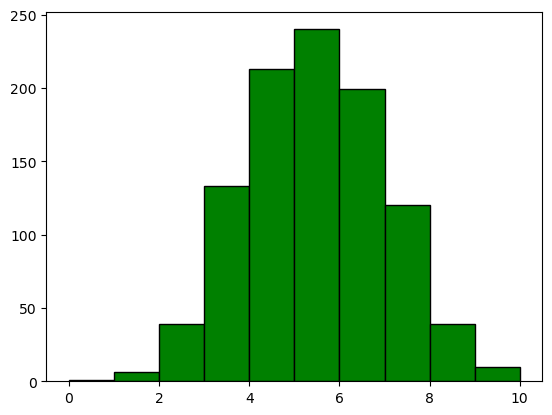

In [50]:
import matplotlib.pyplot as plt

plt.hist(final_tails, bins = 10, edgecolor='black',color='green')
plt.show()